# Exploratory Data Analysis (EDA)

## Introduction
In this notebook, we will perform exploratory data analysis on the cleaned data. The goal is to understand the relationships between different variables, particularly how they correlate with interactions.

## Step 1: Load the Cleaned Data
We start by loading the cleaned data from the previous notebook.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data

In [2]:
df = pd.read_csv('../Data/Clean-Data/cleaned_data.csv')
print("Cleaned Data Loaded:")
df.head(2)

Cleaned Data Loaded:


,id,description,interactions,day_of_week,time_of_day,following,followers,num_posts,is_business_account,category,...,embedded_1019,embedded_1020,embedded_1021,embedded_1022,embedded_1023,description_length,followers_trans,interactions_trans,num_posts_trans,description_length_trans
0,4364357,great evening with craig nicky and david thank...,26,Sunday,night,164,140,59,True,diaries_&_daily_life,...,1.141060,0.021745,-0.881142,0.407194,0.323486,51,4.948760,3.295837,4.094345,3.951244
1,1721285,i went to party to celebrate the s read about ...,57,Tuesday,night,1653,893,831,True,fashion_&_style,...,0.623253,0.418022,-0.629205,0.396398,-0.498219,342,6.795706,4.060443,6.723832,5.837730


In [3]:
print("Shape of the cleaned data:")
df.shape

Shape of the cleaned data:


(6738, 1039)

Loading Data: This step brings the cleaned dataset into the environment for analysis.

## Step 2: Basic Statistical Analysis
We will compute basic statistics and visualize the distribution of key variables.

In [4]:
df[['followers', 'interactions', 'num_posts', 'description_length']].describe()

,followers,interactions,num_posts,description_length
count,6738.000000,6738.000000,6738.000000,6738.000000
mean,820.135055,58.440932,434.174384,140.602256
std,841.298804,50.486573,434.538708,125.556975
min,4.000000,1.000000,2.000000,2.000000
25%,252.000000,21.000000,99.000000,41.000000
50%,541.000000,42.000000,278.500000,97.000000
75%,1067.000000,81.000000,628.000000,209.000000
max,4777.000000,219.000000,1866.000000,532.000000


In [5]:
# Plotting with the viridis palette but colorfull palette
sns.set_palette('viridis')

### Distribution of interactions

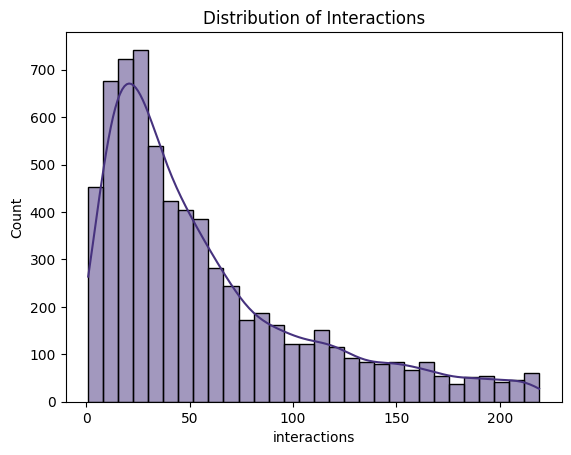

In [6]:
sns.histplot(df['interactions'], bins=30, kde=True)
plt.title('Distribution of Interactions')
plt.show()

### Distribution of followers

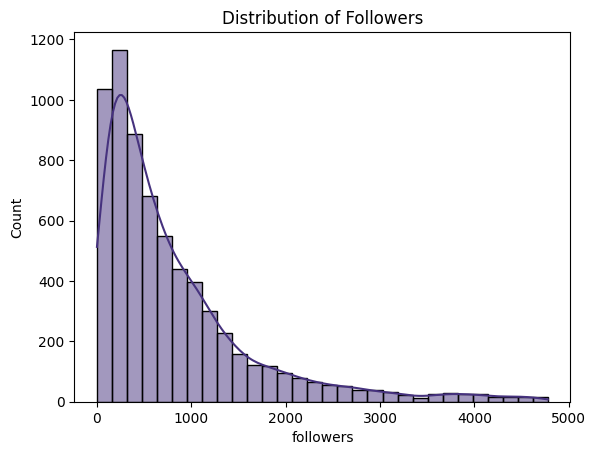

In [7]:
sns.histplot(df['followers'], bins=30, kde=True)
plt.title('Distribution of Followers')
plt.show()

### Distrubution of day of the week

/tmp/ipykernel_48910/2002711321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, palette='viridis')


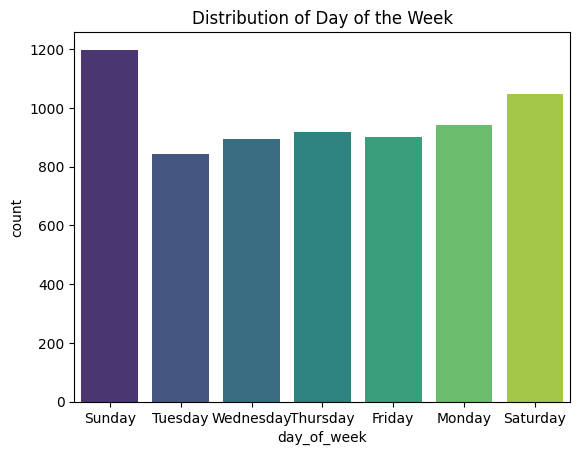

In [8]:
sns.countplot(x='day_of_week', data=df, palette='viridis')
plt.title('Distribution of Day of the Week')
plt.show()

### Distrubution of time of the day

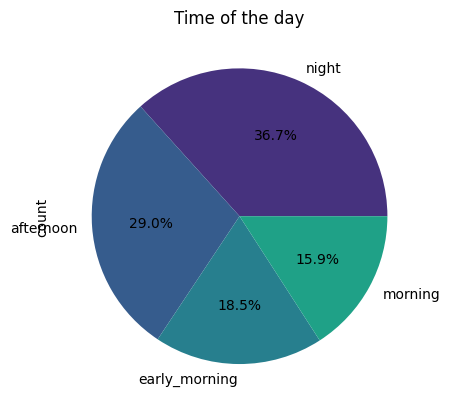

In [9]:
#pie chart of the column time_of_day with viridis color
time_of_day = df['time_of_day'].value_counts()
time_of_day.plot.pie(autopct='%1.1f%%')
plt.title('Time of the day')
plt.show()



### Distrubution of is bussines account

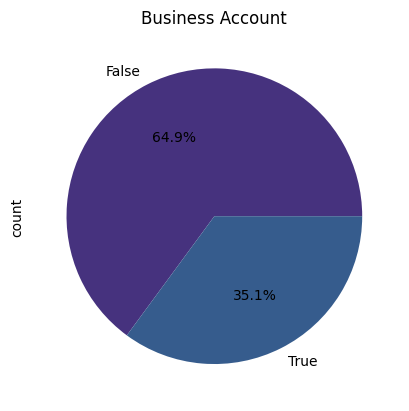

In [10]:
#pie chart of the column is_business_account with viridis color
is_business_account = df['is_business_account'].value_counts()
is_business_account.plot.pie(autopct='%1.1f%%')
plt.title('Business Account')
plt.show()

### Distrubution of lengt of the description

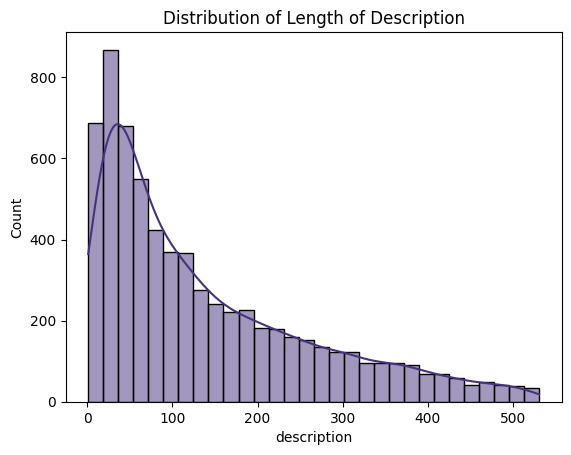

In [11]:
sns.histplot(df['description'].apply(len), bins=30, kde=True)
plt.title('Distribution of Length of Description')
plt.show()

Basic Stats and Distribution: Helps to understand the central tendencies and spread of the data.

## Step 3: Correlation Analysis
We will create a heatmap to visualize the correlations between variables.

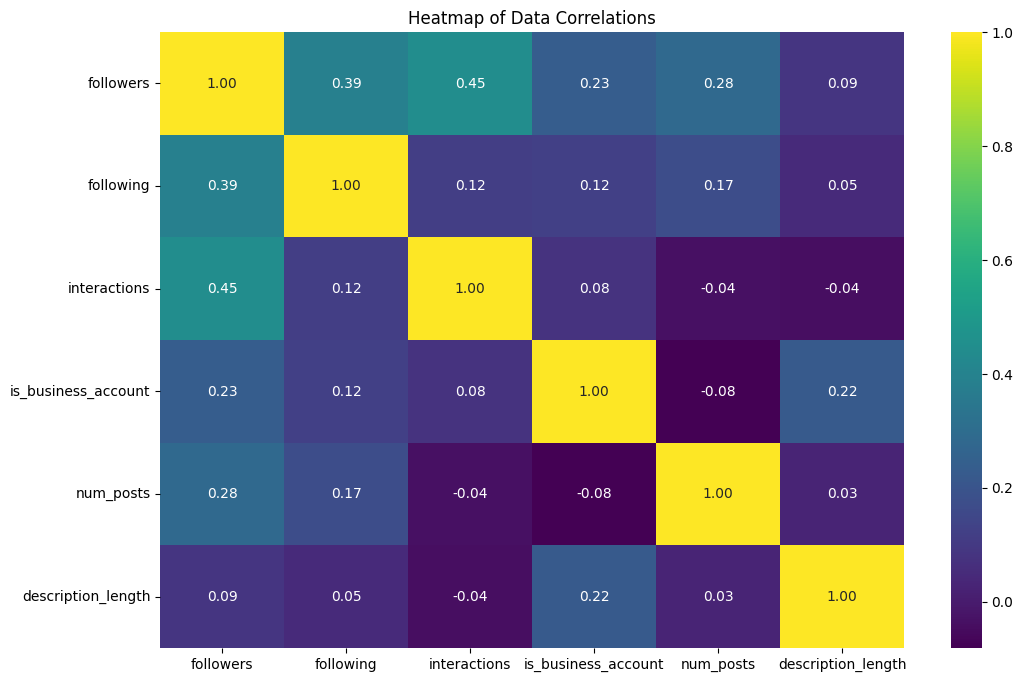

In [12]:
df_heatmap = df[['followers', 'following', 'interactions', 'is_business_account', 'num_posts', 'description_length']]
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Data Correlations')
plt.show()


## Step 4: Analyzing Interactions
We will further analyze how the number of followers, posts, and description length affects interactions.

### Scatter plot of description Length vs. Interactions

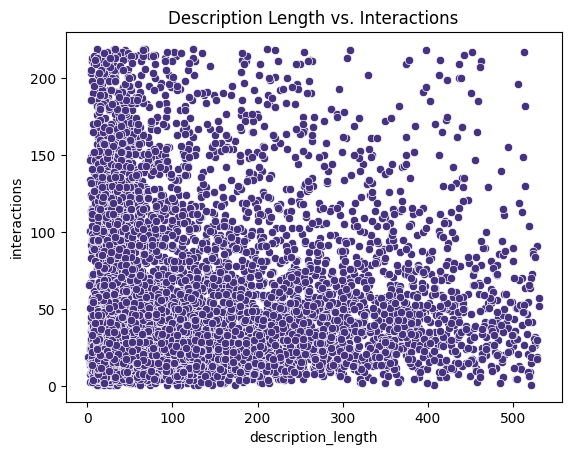

In [13]:
df['description_length'] = df['description'].apply(len)
sns.scatterplot(x='description_length', y='interactions', data=df)
plt.title('Description Length vs. Interactions')
plt.show()

### Scatter plot of followers vs. interactions

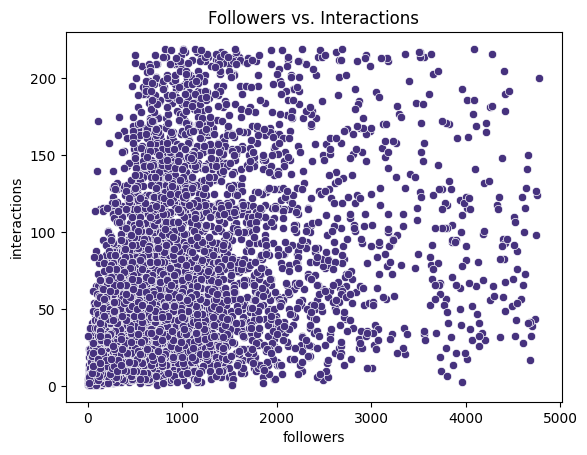

In [14]:
sns.scatterplot(x='followers', y='interactions', data=df)
plt.title('Followers vs. Interactions')
plt.show()

### Scatter plot of posts vs. interactions

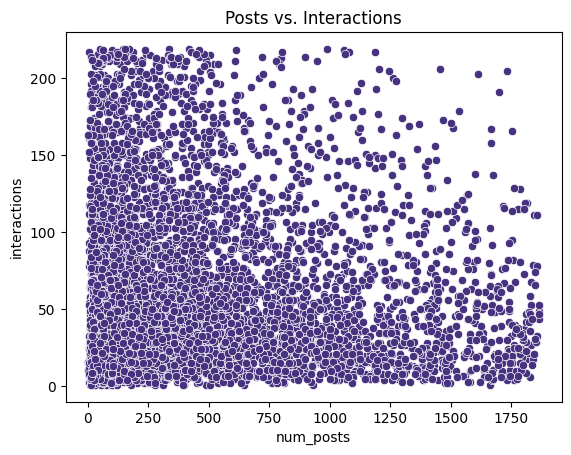

In [15]:
sns.scatterplot(x='num_posts', y='interactions', data=df)
plt.title('Posts vs. Interactions')
plt.show()

# Conclusion
The EDA gives us valuable insights into the dataset, which will inform the next steps in feature engineering and model building. The dataset is now ready for feature engineering and modeling, saved as eda_data.csv.

In [16]:
# Save the data after EDA
df.to_csv('../Data/Clean-Data/eda_data.csv', index=False)


In [18]:
df['interactions_trans']

0       3.295837
1       4.060443
2       3.258097
3       3.091042
4       4.969813
          ...   
6733    4.204693
6734    4.969813
6735    3.218876
6736    3.828641
6737    4.624973
Name: interactions_trans, Length: 6738, dtype: float64

In [17]:
df.shape

(6738, 1039)